In [380]:
import pandas as pd
from math import floor
from datetime import datetime
from math import isnan

In [381]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
# dateparse = lambda x: datetime.utcfromtimestamp(int(float(x)))

In [382]:
def map_range(value, leftMin, leftMax, rightMin, rightMax):
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)


In [383]:
df = pd.read_csv("price.csv", parse_dates=['Date'], date_parser=dateparse)

In [384]:
df

,Date,Close
0,2016-01-02,442.36
1,2016-01-03,442.45
2,2016-01-04,453.31
3,2016-01-06,508.64
4,2016-01-07,484.14
...,...,...
2079,2024-11-04,229.20
2080,2024-12-01,249.30
2081,2024-12-02,267.40
2082,2024-12-03,225.50


In [385]:
start = min(df["Date"]).timestamp()
end = max(df["Date"]).timestamp()
# period = 60 * 60 * 24 * 365.25
period = 60 * 60 * 24 * 365.25

In [400]:
buckets = []
curr = start

while curr <= end:
    buckets.append([curr])
    curr += period

In [401]:
buckets

[[1451692800.0],
 [1483250400.0],
 [1514808000.0],
 [1546365600.0],
 [1577923200.0],
 [1609480800.0],
 [1641038400.0],
 [1672596000.0],
 [1704153600.0]]

In [402]:


# bucket i (zero indexed) starts at (start + i * period)
#                         ends at (start + (i + 1) * period)

In [403]:
num_buckets = floor((end - start) / period) + 1
buckets = [[] for _ in range(num_buckets)]
points = []

X, Y, Z = [], [], []

for i, row in enumerate(df.itertuples()):
    if i % 10 == 0:
        date, price = row[1], row[2]
        timestamp = date.timestamp()

        belongs_in = floor((timestamp - start) / period)

        bucket_min = start + belongs_in * period
        bucket_max = start + (belongs_in + 1) * period

        time_short = map_range(timestamp, bucket_min, bucket_max, -10, 10) # x axis
        # height = map_range(price, -10, 40, 0, 6)                           # y axis
        height = map_range(price, 100, 500, 0, 6)
        time_long = map_range(belongs_in, 0, num_buckets, -10, 10)         # z axis

        # print(time_short, height, time_long)

        if isnan(height):
            continue

        points.append((time_short, time_long, height))

        X.append(time_short)
        Y.append(height)
        Z.append(time_long)

In [404]:
from mpl_toolkits import mplot3d

In [405]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, 'y')

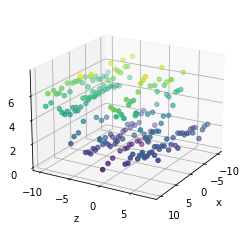

In [406]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(20, 30, 0)
ax.scatter3D(X, Z, Y, c=Y)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')

In [407]:
# df_processed = pd.DataFrame(points, columns=["TimeShort", "TimeLong", "Temp"])
df_processed = pd.DataFrame(points, columns=["TimeShort", "TimeLong", "Price"])

In [408]:
df_processed.to_csv("price_processed.csv", index=False)

In [409]:
df_processed

,TimeShort,TimeLong,Price
0,-10.000000,-10.000000,5.1354
1,-9.342916,-10.000000,4.8054
2,-8.576318,-10.000000,4.9725
3,-7.535934,-10.000000,4.8558
4,-6.714579,-10.000000,4.9566
...,...,...,...
204,-6.933607,7.777778,2.2530
205,-5.728953,7.777778,1.6950
206,-3.429158,7.777778,2.5485
207,1.718001,7.777778,2.1210


In [398]:
null_data = df_processed[df_processed.isnull().any(axis=1)]

In [399]:
null_data

,TimeShort,TimeLong,Price
